# LOGISTIC REGRESSION

## CHURN PREDICTION FOR TELECOM 

### Problem Statement-


We have a telecom firm which has calculated data of all it's customers. 
The main type of atrributes in the dataset are:
1.) Demographics(Like what's the age,gender etc of a person)
2.) What are the services availed by the customer(internet pack,special offers etc) 
3.) Expenses(amount of recharge done per month) 

On the basis of this information we have to build a model which will predict whether a particular customer will churn(Binary variable-1)or not(Binary Variable-0).There are 20 features(independent)and 1 target (dependent) avriable for 7043 customers.

## Import packages and modules required:

In [4]:
#Supress Warning

import warnings
warnings.filterwarnings

#import the numpy and pandas package

import numpy as np
import pandas as pd

#Data Visualisation

import matplotlib.pyplot as plt
import seaborn as sns

## Reading and Understanding the data:

In [5]:
churn_data= pd.read_csv("F:\\churn_data.csv")
churn_data.head(5)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
customer_data=pd.read_csv("F:\\customer_data.csv")
customer_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [7]:
internet_data=pd.read_csv("F:\\internet_data.csv")
internet_data.head(5)

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [8]:
[churn_data.shape,customer_data.shape,internet_data.shape]

[(7043, 9), (7043, 5), (7043, 9)]

## Merging CSV files:

In [9]:
df_0=pd.merge(churn_data,customer_data,on='customerID')

In [10]:
#Final dataframe
tel=pd.merge(df_0,internet_data,on='customerID')

In [11]:
# Data Inspection
tel.head(5)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


## EXPLORATORY DATA ANALYSIS

In [12]:
tel.shape

(7043, 21)

In [13]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


## Data Cleaning

In [14]:
tel=tel.replace(' ',np.nan)
tel.isnull().sum()

customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
dtype: int64

There are 11 null values in total charges column.

## Missing Data Evaluation:

In [15]:
tel=tel.dropna(axis=0)
tel['TotalCharges']=pd.to_numeric(tel['TotalCharges'])
tel['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [16]:
tel.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

Target Variable has imbalanced class Distribution.Positive class (Churn=Yes) is much less than  Negative class(Churn=No).
Imbalanced class distributions influence the performance of a machine learning model negatively.
We will use Upsampling or downsampling to overcome this issue.


# CHURN RATIO


Also Known as Customer Churn,the rate at which customers stop doing business with an entity.

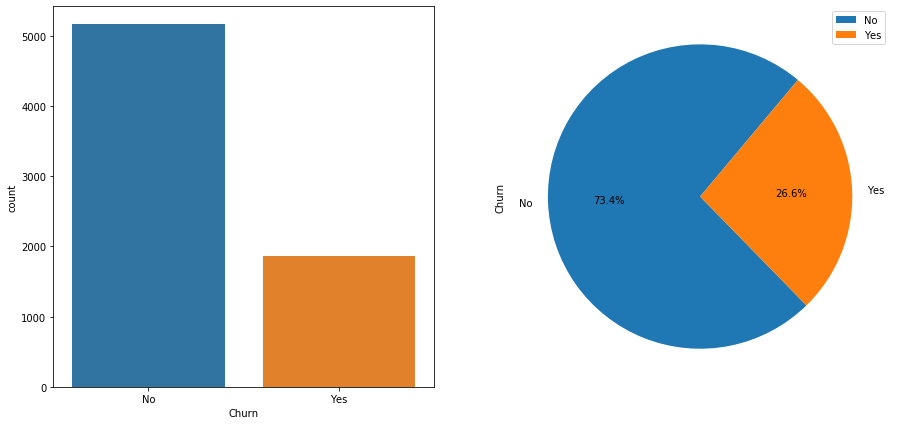

In [17]:
fig,axs = plt.subplots(1, 2, figsize=(15,7))

plt1=sns.countplot("Churn", data=tel, ax=axs[0])

pie_churn=pd.DataFrame(tel['Churn'].value_counts())
pie_churn.plot.pie(subplots=True,labels=pie_churn.index.values,autopct='%1.1f%%',figsize=(15,7),startangle=50,ax=axs[1])

plt.gca().set_aspect('equal')
plt.show()

Churn Rate is 27% which shows that there are more number of customers leaving the firm

# GRAPHS AND PLOTS:

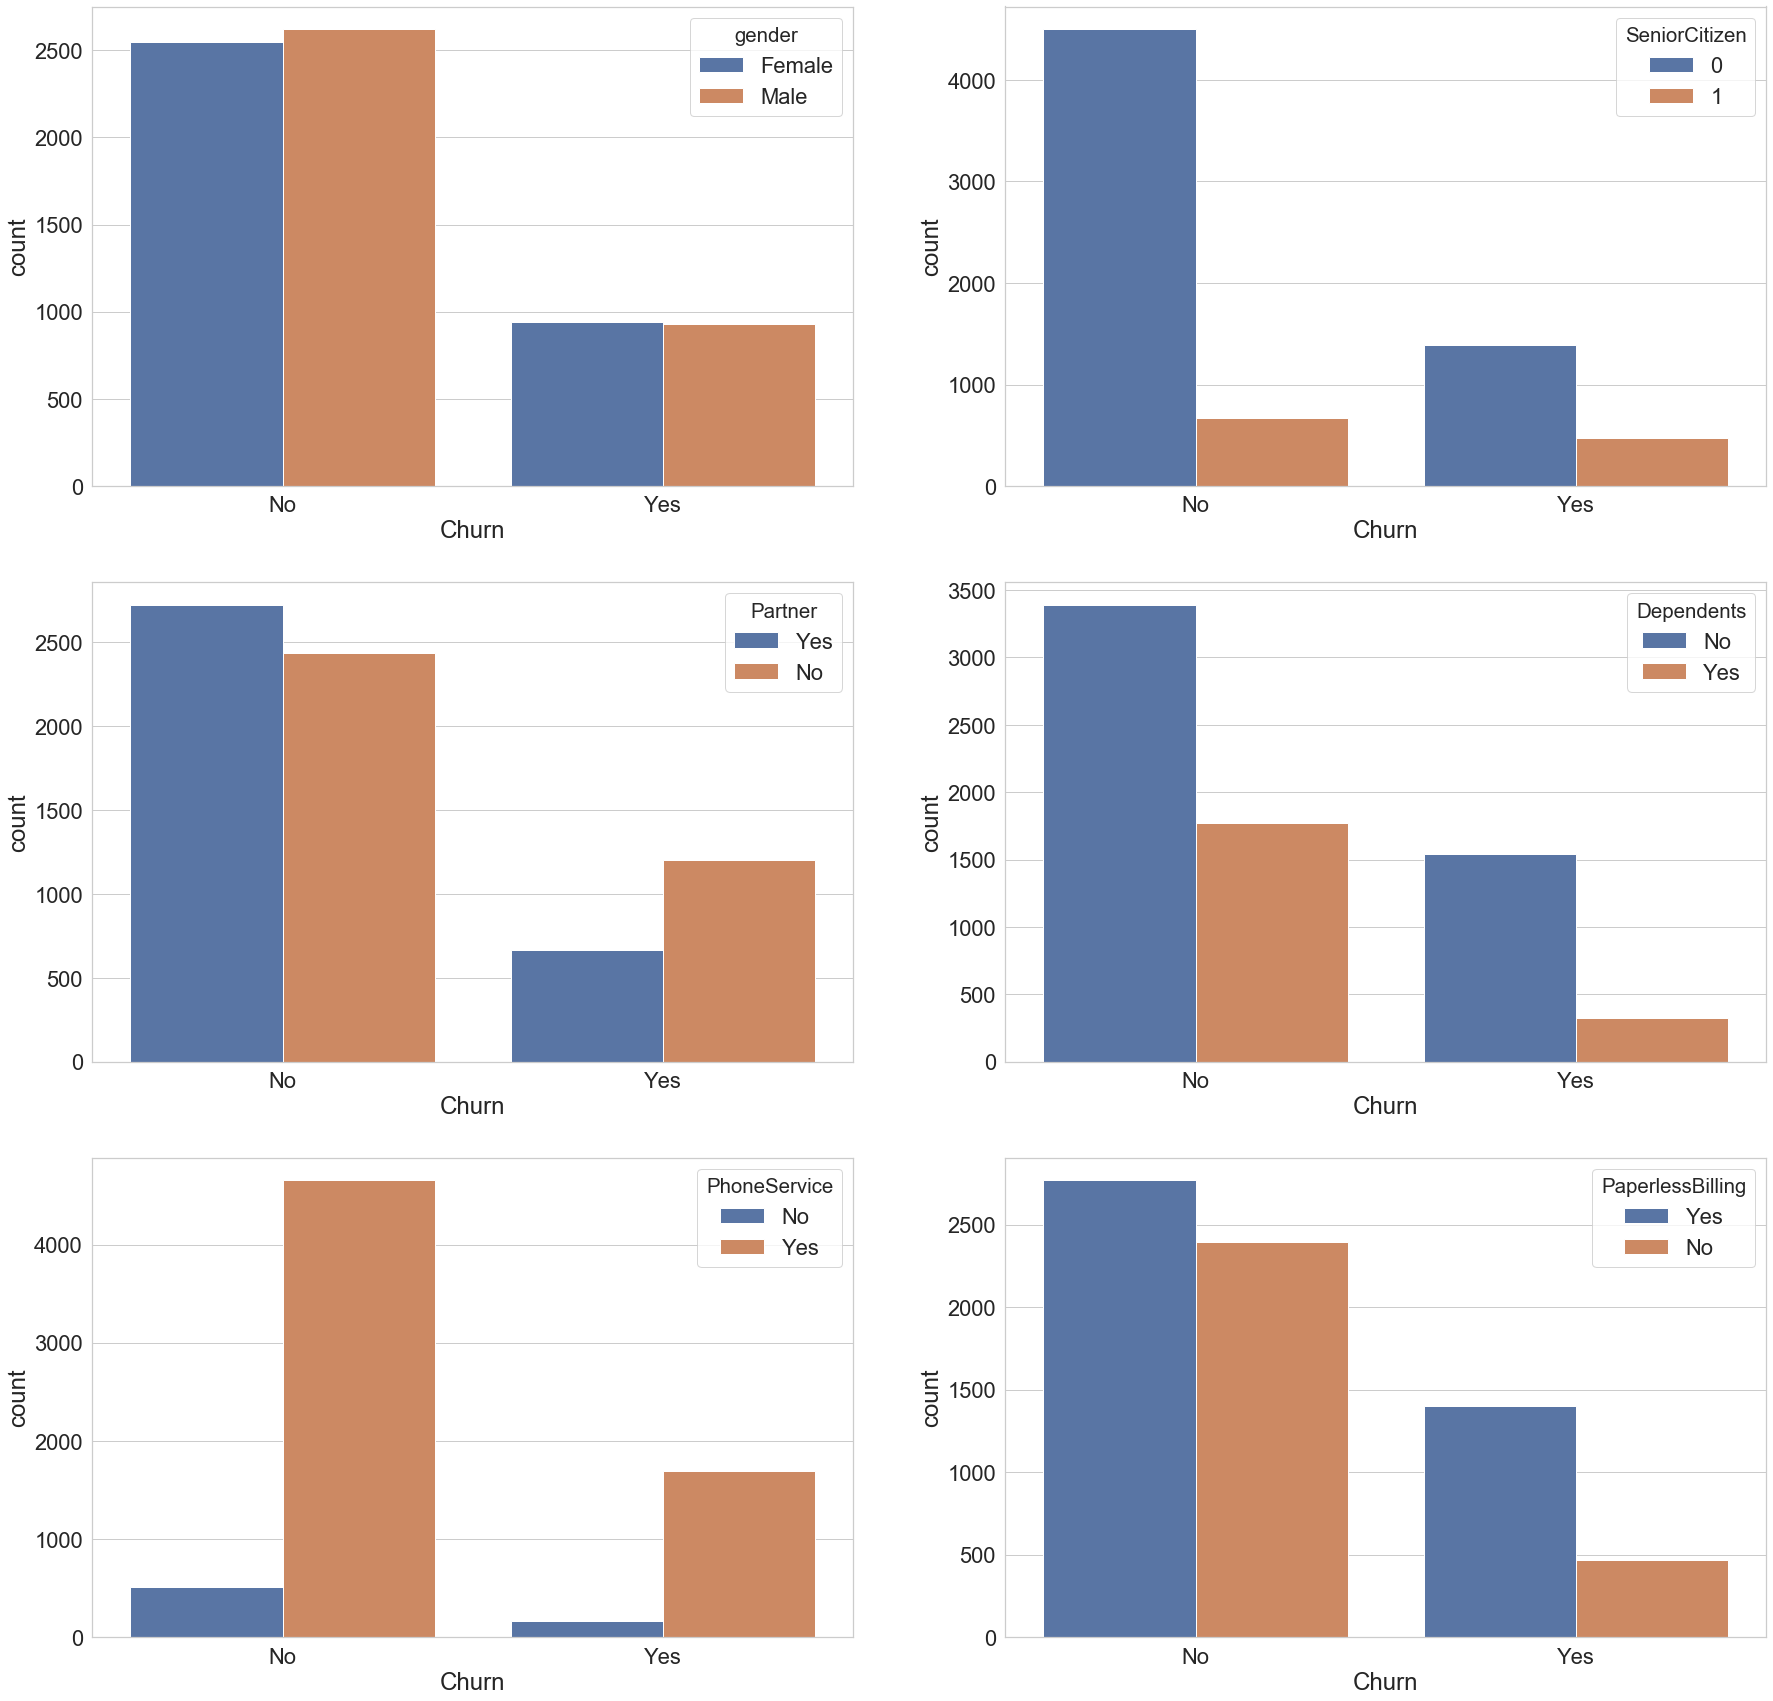

In [18]:

plt.figure(figsize=(30,30))
sns.set(font_scale=2,style='whitegrid')
plt.subplot(3,2,1)
sns.countplot(x='Churn',hue='gender',data=tel)

plt.subplot(3,2,2)
sns.countplot(x='Churn',hue='SeniorCitizen',data=tel)

plt.subplot(3,2,3)
sns.countplot(x='Churn',hue='Partner',data=tel)

plt.subplot(3,2,4)
sns.countplot(x='Churn',hue='Dependents',data=tel)

plt.subplot(3,2,5)
sns.countplot(x='Churn',hue='PhoneService',data=tel)
           
plt.subplot(3,2,6)
sns.countplot(x='Churn',hue='PaperlessBilling',data=tel)


plt.show()

 ##### CONCLUSION-
 
 - There is a high imbalance in Senior Citizen and Phone Service variables.
 - Most of the customers are not senior and similarly,most customers have a phone service
 - Genderwise,almost equal no of females and males use the service.

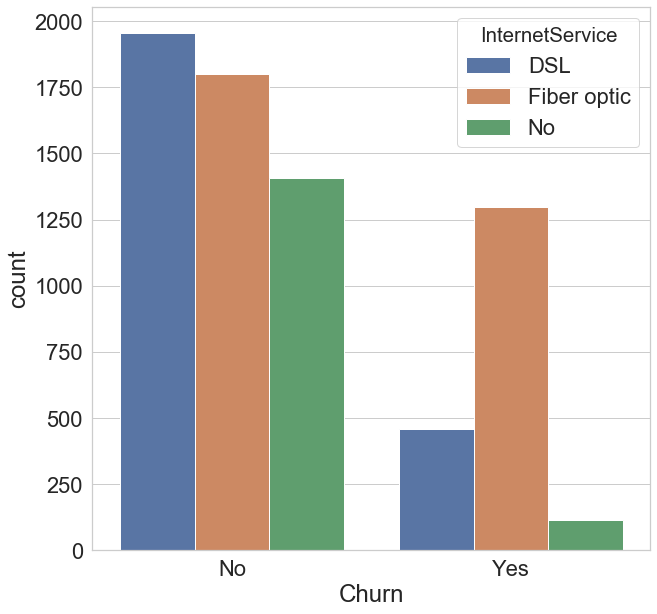

In [19]:
plt.figure(figsize=(10,10))
sns.set(font_scale=2,style='whitegrid')
sns.countplot(x='Churn',hue='InternetService',data=tel)

Internet service variable is definitely important in predicting churn rate.As you can see,customers with fiber optic internet service are much likely to churn than other customers although there is not a big difference in the number of customers with DSL and fibre optic.This company may have some problems with fibre optic connection.

In [20]:
tel[['InternetService','MonthlyCharges']].groupby('InternetService').mean()

,MonthlyCharges
InternetService,
DSL,58.088017
Fiber optic,91.500129
No,21.076283


 - Fibre optic is much more expensive than DSL which might be the reason why customers churn.

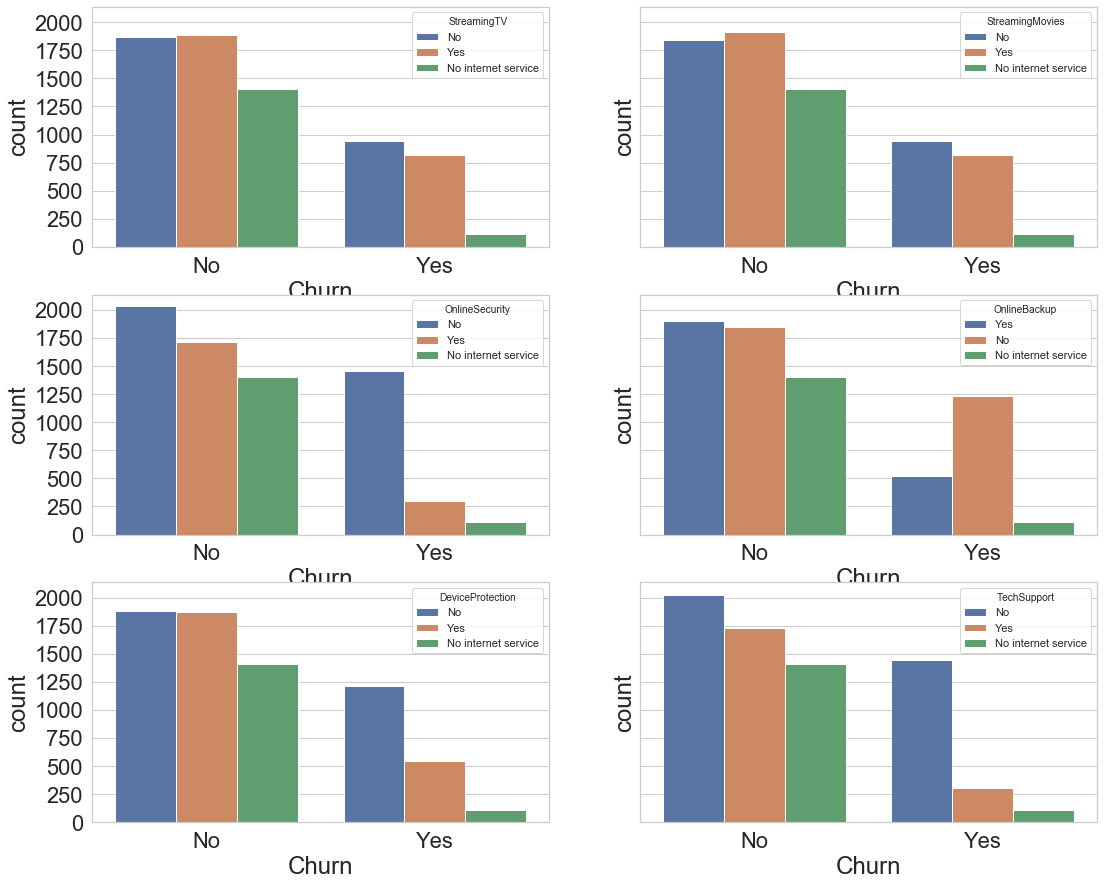

In [21]:
fig,axes=plt.subplots(3,2,figsize=(18,15),sharey=True)
sns.set(style='whitegrid')
sns.countplot(x='Churn',hue="StreamingTV",data=tel,ax=axes[0,0])
sns.countplot(x='Churn',hue="StreamingMovies",data=tel,ax=axes[0,1])
sns.countplot(x='Churn',hue="OnlineSecurity",data=tel,ax=axes[1,0])
sns.countplot(x='Churn',hue="OnlineBackup",data=tel,ax=axes[1,1])
sns.countplot(x='Churn',hue="DeviceProtection",data=tel,ax=axes[2,0])
sns.countplot(x='Churn',hue="TechSupport",data=tel,ax=axes[2,1])

 ##### CONCLUSION-
 
 - There is a high imbalance in Senior Citizen and Phone Service variables.
 - Most of the customers are not senior and similarly,most customers have a phone service
 - Genderwise,almost equal no of females and males use the service.

In [22]:
print(tel[['StreamingTV','MonthlyCharges']].groupby('StreamingTV').mean())
print(tel[['StreamingMovies','MonthlyCharges']].groupby('StreamingMovies').mean())
print(tel[['OnlineSecurity','MonthlyCharges']].groupby('OnlineSecurity').mean())
print(tel[['OnlineBackup','MonthlyCharges']].groupby('OnlineBackup').mean())
print(tel[['TechSupport','MonthlyCharges']].groupby('TechSupport').mean())
print(tel[['DeviceProtection','MonthlyCharges']].groupby('DeviceProtection').mean())

                     MonthlyCharges
StreamingTV                        
No                        65.388928
No internet service       21.076283
Yes                       88.770829
                     MonthlyCharges
StreamingMovies                    
No                        65.440579
No internet service       21.076283
Yes                       88.478506
                     MonthlyCharges
OnlineSecurity                     
No                        75.693737
No internet service       21.076283
Yes                       78.870496
                     MonthlyCharges
OnlineBackup                       
No                        71.944282
No internet service       21.076283
Yes                       83.106412
                     MonthlyCharges
TechSupport                        
No                        74.584879
No internet service       21.076283
Yes                       80.718799
                     MonthlyCharges
DeviceProtection                   
No                        70

 - All internet related services seem to have different churn rates changes according to customers having these services
 - Difference btwn StreamingTV and StreamingMovies is not so much but they can still bring value to our model

## Phone services-

In [23]:
tel.PhoneService.value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [24]:
tel.MultipleLines.value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

- If a customer does not have a phone service,he/she can not have multiple lines
 - MultipleLines include more specific data
 - To understand how many customers use phone service,multiple line column is enough

## Contract and Payment Method

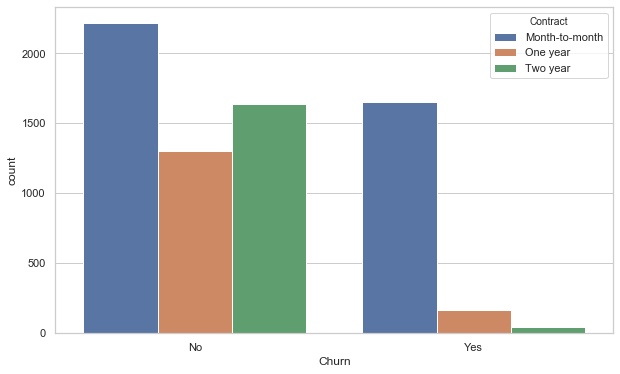

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x='Churn',hue='Contract',data=tel)

 - Customer with short term contract are more likely to churn.
 ### MOTIVATION-
 COMPANIES SHOULD HAVE LONGTERM RELATIONSHIPS WITH THEIR CUSTOMERS!

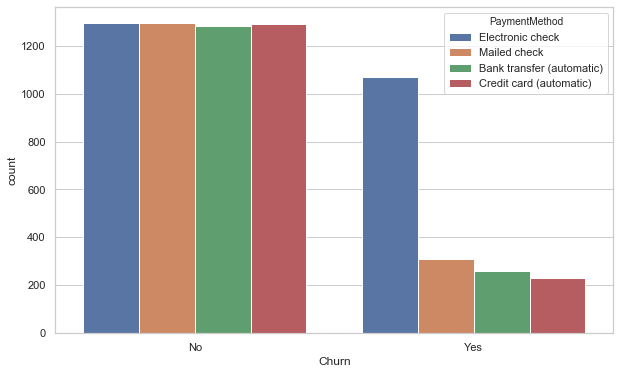

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x='Churn',hue='PaymentMethod',data=tel)

 - Customers who pay with electronic check are more likely to churn and this kind of payment is more common tha other type of payment.

### CONTINUOUS FEATURES:

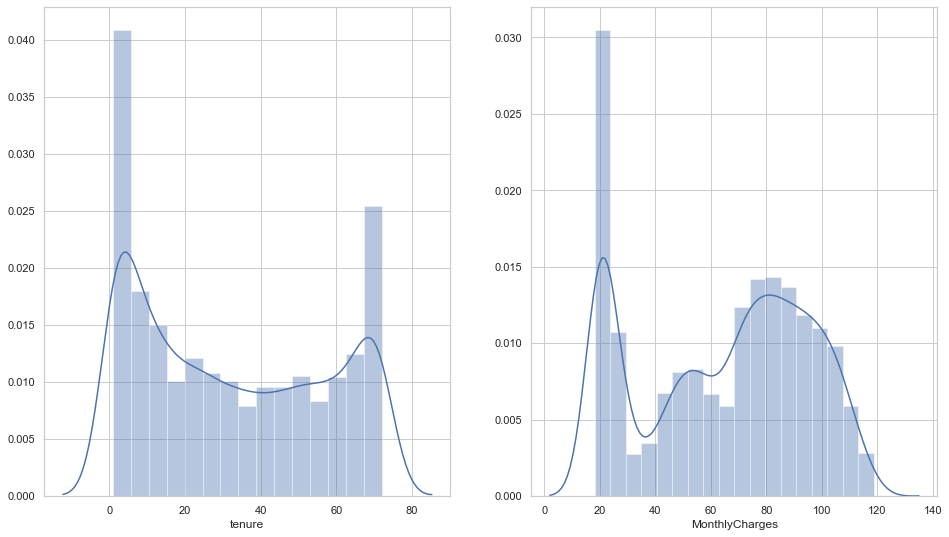

In [27]:
fig,axes=plt.subplots(1,2,figsize=(16,9))
sns.distplot(tel['tenure'],ax=axes[0])
sns.distplot(tel['MonthlyCharges'],ax=axes[1])

- Continuous Features are tenure,monthly charges,and total charges
- According to distribution of tenure variable,most of the customers are either pretty now or have stayed for a long time with the company.
- Similar trend is seen on MonthlyCharges.There seems to be a gap between low and high rates.

In [28]:
tel[['tenure','MonthlyCharges','Churn']].groupby('Churn').mean()

,tenure,MonthlyCharges
Churn,,
No,37.650010,61.307408
Yes,17.979133,74.441332


 - The average Tenure in months for people wh have left the company is 20 months less than average for people who stay.

# Data Preprocessing:

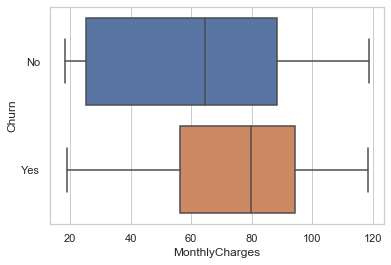

In [29]:
sns.boxplot(y='Churn',x='MonthlyCharges',data=tel)


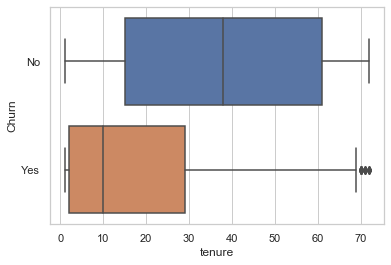

In [30]:
sns.boxplot(y='Churn',x='tenure',data=tel)

No such Outliers present that need to be removed

## Label Encoding & One Hot Encoding:

In [31]:
var=['PhoneService','PaperlessBilling','Churn','Partner','Dependents']
def binary_map(x):
    return x.map({"Yes":1,"No":0})
tel[var]=tel[var].apply(binary_map)

In [32]:
#Creating Dummy Variables:

In [33]:
dummy1=pd.get_dummies(tel[['Contract','PaymentMethod','gender','InternetService']],drop_first=True)
tel=pd.concat([tel,dummy1],axis=1)

In [34]:
tel.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,No,No,1,0,0,0,1,1,0,0


In [35]:
ml=pd.get_dummies(tel['MultipleLines'],prefix='MultipleLines')
ml1=ml.drop(['MultipleLines_No phone service'],1)
tel=pd.concat([tel,ml1],axis=1)

os=pd.get_dummies(tel['OnlineSecurity'],prefix='MultipleLines')
os1=os.drop(['MultipleLines_No internet service'],1)
tel=pd.concat([tel,os1],axis=1)

ob=pd.get_dummies(tel['OnlineBackup'],prefix='OnlineBackup')
ob1=ob.drop(['OnlineBackup_No internet service'],1)
tel=pd.concat([tel,ob1],axis=1)

dp=pd.get_dummies(tel['DeviceProtection'],prefix='DeviceProtection')
dp1=dp.drop(['DeviceProtection_No internet service'],1)
tel=pd.concat([tel,dp1],axis=1)


dp=pd.get_dummies(tel['TechSupport'],prefix='TechSupport')
dp1=dp.drop(['TechSupport_No internet service'],1)
tel=pd.concat([tel,dp1],axis=1)

st=pd.get_dummies(tel['StreamingTV'],prefix='StreamingTV')
st1=st.drop(['StreamingTV_No internet service'],1)
tel=pd.concat([tel,st1],axis=1)


ts=pd.get_dummies(tel['StreamingMovies'],prefix='StreamingMovies')
ts1=ts.drop(['StreamingMovies_No internet service'],1)
tel=pd.concat([tel,ts1],axis=1)


In [36]:
tel.head(3)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0


Dropping repeated columns:

In [37]:
tel=tel.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService','customerID','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],1)

# Heat Map

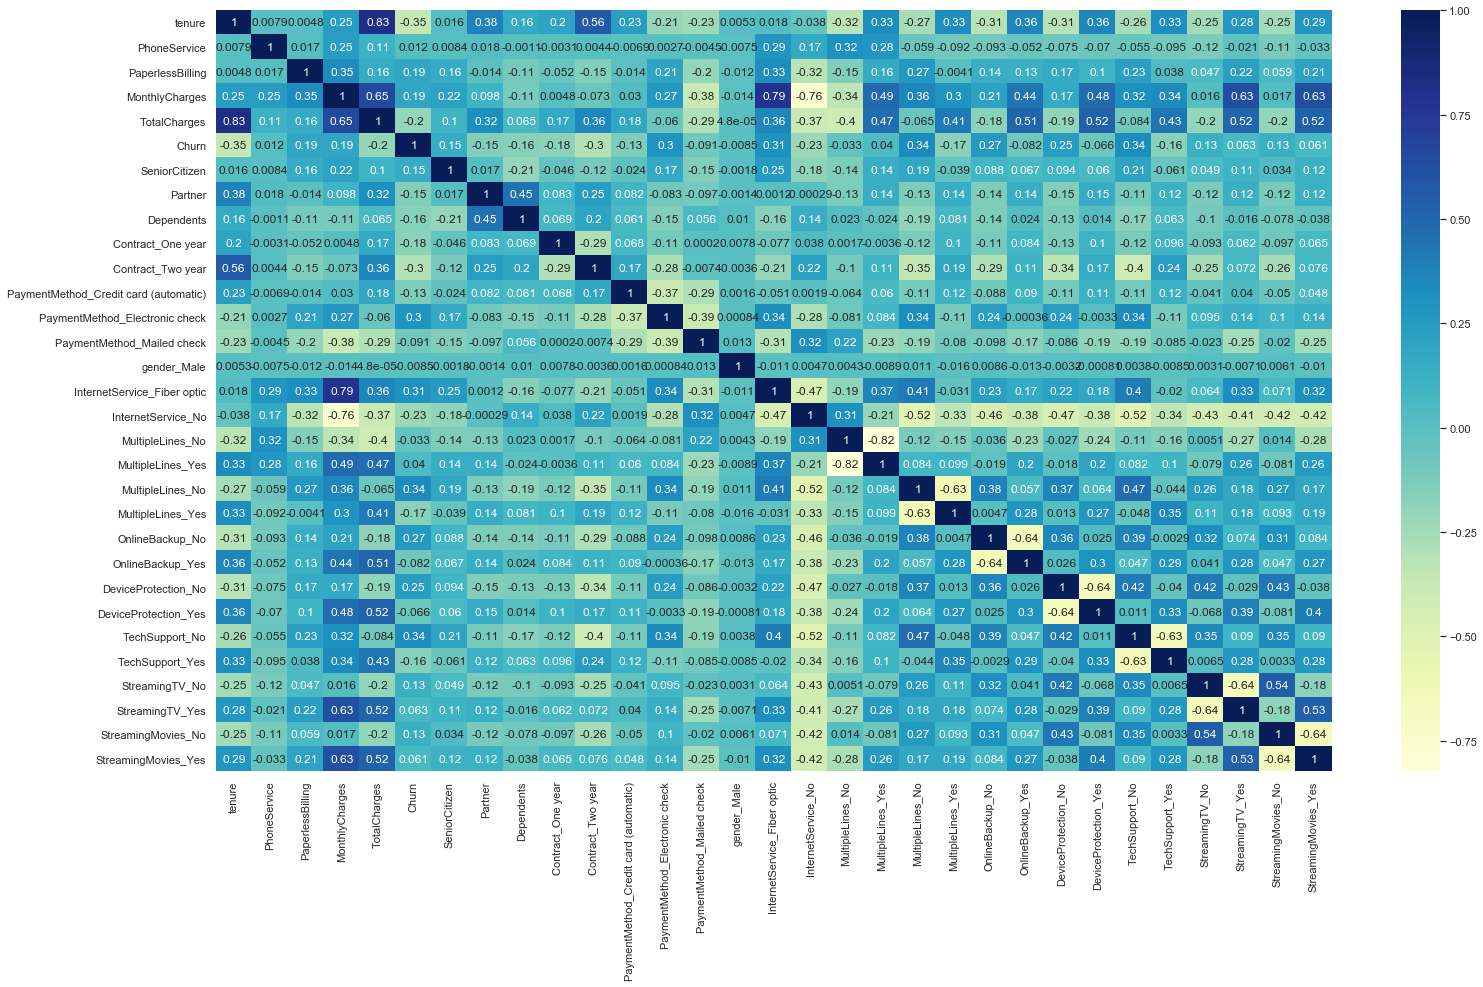

In [38]:
plt.figure(figsize=(25,14))
sns.heatmap(tel.corr(),annot=True,cmap='YlGnBu')
plt.show()

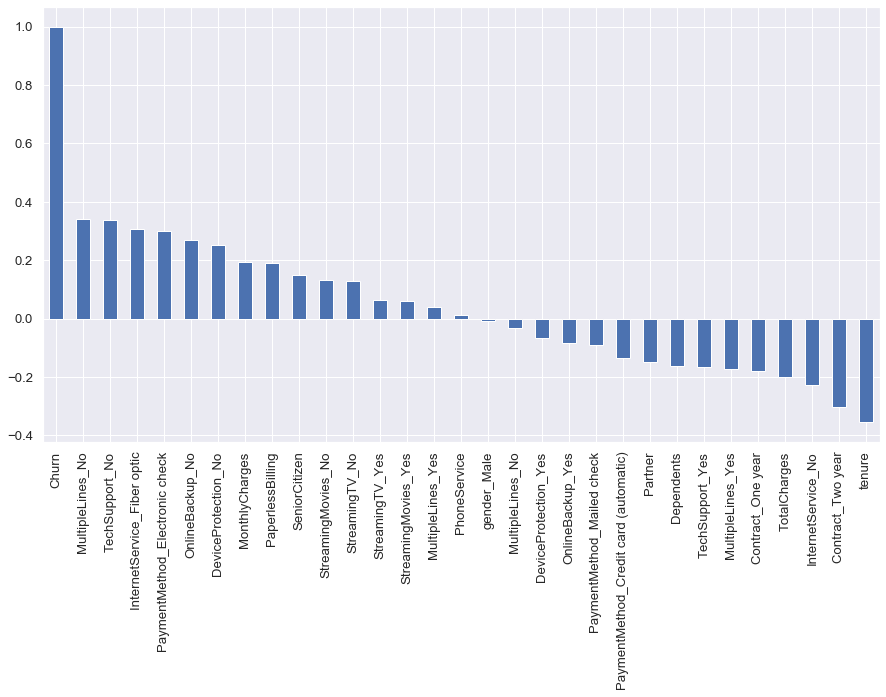

In [39]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.2)
tel.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.show()

You can clearly see which coeficients affect the targetvariables the most.

## Checking The Database:

In [40]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7032 non-null   int64  
 1   PhoneService                           7032 non-null   int64  
 2   PaperlessBilling                       7032 non-null   int64  
 3   MonthlyCharges                         7032 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   Churn                                  7032 non-null   int64  
 6   SeniorCitizen                          7032 non-null   int64  
 7   Partner                                7032 non-null   int64  
 8   Dependents                             7032 non-null   int64  
 9   Contract_One year                      7032 non-null   uint8  
 10  Contract_Two year                      7032 non-null   uint8  
 11  Paym

## Scaling the data:

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
sc=MinMaxScaler()
a=sc.fit_transform(tel[['tenure']])
b=sc.fit_transform(tel[['MonthlyCharges']])
c=sc.fit_transform(tel[['TotalCharges']])
tel['tenure']=a
tel['MonthlyCharges']=b
tel['TotalCharges']=c

In [43]:
tel.shape

(7032, 31)

# Resampling

#### UPSAMPLING
 - Increasing number os samples of class with less samples by randomly selecting rows for it

Text(0.5, 1.0, 'ClassDistribution Before Resampling')

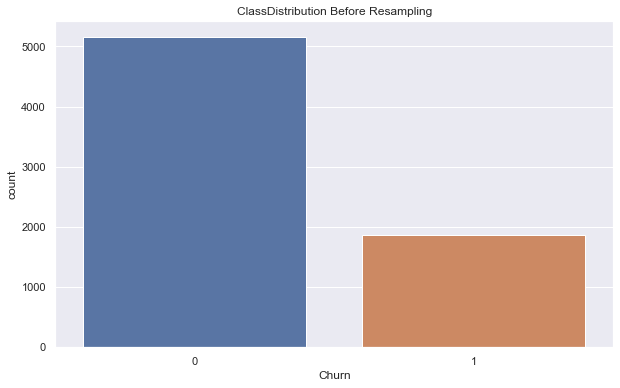

In [44]:
plt.figure(figsize=(10,6))
sns.set(style='darkgrid')
sns.countplot('Churn',data=tel).set_title('ClassDistribution Before Resampling')

In [45]:
tel_no=tel[tel.Churn==0]
tel_yes=tel[tel.Churn==1]


In [48]:
#upsampling the positive class
tel_no_downsampled=tel_no.sample(n=len(tel_yes),replace=True,random_state=0)
print(len(tel_no_downsampled))

1869


Text(0.5, 1.0, 'After Resampling')

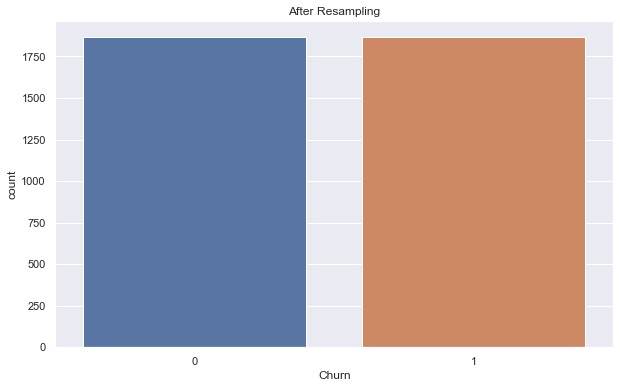

In [49]:
# combining positive and negative class:

plt.figure(figsize=(10,6))
sns.set(style='darkgrid')
tel_downsampled=tel_yes.append(tel_no_downsampled).reset_index(drop=True)
sns.countplot('Churn',data=tel_downsampled).set_title('After Resampling')


# Model Creation and Evaluation

In [50]:
from sklearn.model_selection import train_test_split

In [52]:
x=tel_downsampled.drop(['Churn'],axis=1)
y=tel_downsampled['Churn']

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=0)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [59]:
m=LogisticRegression()
m.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
pred=m.predict(x_train)
accuracy_score(y_train,pred)

0.7725752508361204

In [65]:
pred_test=m.predict(x_test)
accuracy_score(y_test,pred_test)

0.7406417112299465

# Confusion Matrix

In [67]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm=metrics.confusion_matrix(y_test,pred_test)
cm_tel=pd.DataFrame(cm,columns=['Predicted Negative','Predicted Positive'],index=['Actual Negative','Actual Positive'])
#showing Confusion Matrix 
cm_tel

,Predicted Negative,Predicted Positive
Actual Negative,267,107
Actual Positive,87,287


### ACCURACY, PRECISION, SPECIFICITY, RECALL/SENSITIVITY,F SCORE ,SUPPORT


In [70]:
a=[]
a.append(accuracy_score(y_test,pred_test))
a.append(cm[1,1]/(cm[1,0]+cm[1,1]))
a=a+list(metrics.precision_recall_fscore_support(y_test,pred_test,average='weighted'))
report=pd.DataFrame(a,columns=['Value'],index=['Accuracy','Specificity','Precision','Recall/Sensitivity','F score','Support'])
report

,Value
Accuracy,0.740642
Specificity,0.767380
Precision,0.741332
Recall/Sensitivity,0.740642
F score,0.740456
Support,NaN


Text(0.5, 1, 'Accuracy Score:0.7406417112299465')

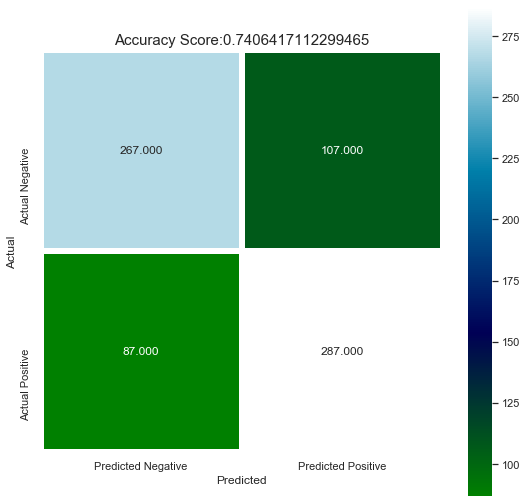

In [72]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_tel,annot=True,fmt=".3f",linewidths=5,square=True,cmap='ocean')
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title='Accuracy Score:{0}'.format(accuracy_score(y_test,pred_test))
plt.title(all_sample_title,size=15)

# ROC CURVE

 - Receiver Operating Charactersitic(ROC)curve is a plot of the true positive rate(Recall) against the false positive rate.
 - It shows the tradeoff between sensitivity and specificity.

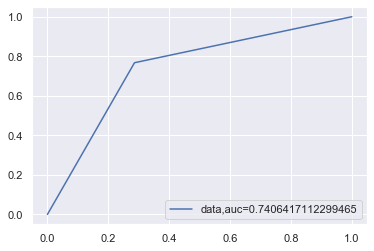

In [74]:
y_pred=m.predict(x_test)
fpr,tpr,_=metrics.roc_curve(y_test,y_pred)
auc=metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label="data,auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC SCORE: 0.74